# Annotation Tools

It can be helpful to annotate our gene and cell data for visualization purposes. In the following notebook we'll walk through the annotation methods in Giotto

----

First, we'll directly import our Leiden clustered data:

In [20]:
source("scripts//clustered_obj.R")

Skipping install of 'Giotto' from a github remote, the SHA1 (1b60529f) has not changed since last install.
  Use `force = TRUE` to force installation




 giotto environment found at 
 /Users/natalie_dr/Library/r-miniconda/envs/giotto_env/bin/pythonw 
Giotto environment is already installed, set force_environment = TRUE to reinstall 
Consider to install these (optional) packages to run all possible Giotto commands:  scran MAST tiff biomaRt trendsceek multinet RTriangle FactoMiner
 Giotto does not automatically install all these packages as they are not absolutely required and this reduces the number of dependencies
 no external python path was provided, but a giotto python environment was found and will be used 

 first scale genes and then cells 
return_plot = TRUE and return_gobject = TRUE 

          plot will not be returned to object, but can still be saved with save_plot = TRUE or manually 
hvg  was found in the gene metadata information and will be used to select highly variable genes 


Warning message in (function (A, nv = 5, nu = nv, maxit = 1000, work = nv + 7, reorth = TRUE, :
“You're computing too large a percentage of total singular values, use a standard svd instead.”


Let's take a look at our clustering results (we have 4 different clusters)

In [21]:
# show leiden clustering results
cell_metadata = pDataDT(my_giotto_object)
cell_metadata[['leiden_clus']]

[1] 3 4 3 2 2 1 2 1 3 1 2 3 4 1 2 1 1 3 4 3 2 4 1 1 1 3 3 3 2 2 1 2 2 2 4 1 1
 [38] 1 4 4 3 4 1 1 1 4 1 1 1 4 4 1 3 1 4 2 2 3 4 3 2 1 3 1 2 4 2 3 3 2 3 3 2 2
 [75] 3 3 2 4 4 3 4 4 4 1 3 4 1 2 1 3 2 4 3 1 2 2 2 3 2 4 3 1 3 1 1 4 2 2 4 1 2
[112] 2 2 1 2 4 1 4

Now we can create a vector that has the names we want to use for annotation

In [22]:
# create vector with cell type names as names of the vector
clusters_cell_types = c('cell_type_1', 'cell_type_2', 'cell_type_3', 'cell_type_4')
names(clusters_cell_types) = 1:4 # leiden clustering results

### 1. Annotate 


In [23]:
# convert cluster results into annotations and add to cell metadata
my_giotto_object = annotateGiotto(gobject = my_giotto_object,
                                         annotation_vector = clusters_cell_types,
                                         cluster_column = 'leiden_clus', 
                                         name = 'cell_types')

We can inspect our data table to see that we now have a ```cell_types``` column

In [24]:
head(pDataDT(my_giotto_object), 5)

cell_ID,nr_genes,perc_genes,total_expr,leiden_clus,cell_types
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
cell_1,896,50.50733,2504.8375,3,cell_type_3
cell_2,395,22.26607,1550.1977,4,cell_type_4
cell_3,556,31.34160,1905.6182,3,cell_type_3
cell_4,205,11.55581,963.5218,2,cell_type_2
cell_5,433,24.40812,1633.1304,2,cell_type_2


Now we can take a look at how our annotation plays out in visualization:

named list()

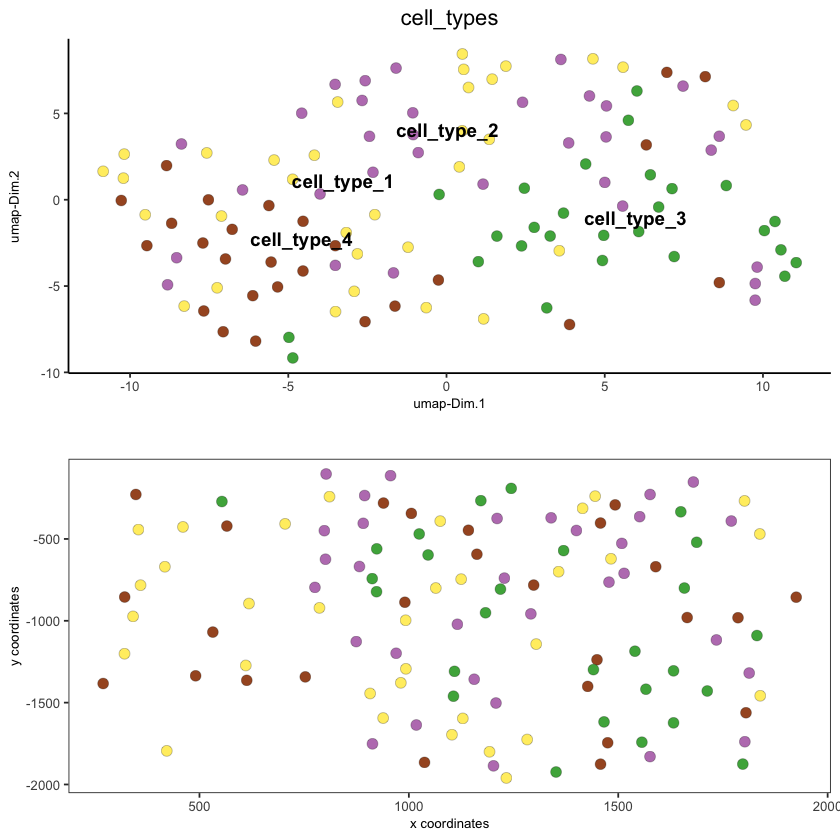

In [34]:
# visualize annotation results
# annotation name is cell_types as provided in the previous command
spatDimPlot(gobject = my_giotto_single_cell,
            cell_color = 'cell_types',
            spat_point_size = 3, dim_point_size = 3)[0]

### 2. Remove annotation

We can also remove the annotation we created. Below is a preview of our annotated data:

In [26]:
head(pDataDT(my_giotto_object), 5)

cell_ID,nr_genes,perc_genes,total_expr,leiden_clus,cell_types
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
cell_1,896,50.50733,2504.8375,3,cell_type_3
cell_2,395,22.26607,1550.1977,4,cell_type_4
cell_3,556,31.34160,1905.6182,3,cell_type_3
cell_4,205,11.55581,963.5218,2,cell_type_2
cell_5,433,24.40812,1633.1304,2,cell_type_2


Now we'll remove the cell annotation

In [28]:
my_giotto_object = removeCellAnnotation(my_giotto_object,
                                       columns = 'cell_types')

And we can see that the ```cell_types``` column is gone:

In [29]:
head(pDataDT(my_giotto_object), 5)

cell_ID,nr_genes,perc_genes,total_expr,leiden_clus
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
cell_1,896,50.50733,2504.8375,3
cell_2,395,22.26607,1550.1977,4
cell_3,556,31.34160,1905.6182,3
cell_4,205,11.55581,963.5218,2
cell_5,433,24.40812,1633.1304,2


The same goes for our gene data. Below is our annotated gene data:

In [31]:
head(fDataDT(my_giotto_object), 5)

gene_ID,nr_cells,perc_cells,total_expr,mean_expr,mean_expr_det,hvg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Aanat,27,22.881356,100.72318,0.8535863,3.730488,no
Aasdh,11,9.322034,40.76670,0.3454805,3.706063,no
Aatf,37,31.355932,135.01068,1.1441583,3.648937,no
Abat,40,33.898305,156.56491,1.3268213,3.914123,no
Abca4,25,21.186441,92.19244,0.7812919,3.687698,no


Now we'll remove the number of cells annotation:

In [32]:
my_giotto_object = removeGeneAnnotation(my_giotto_object, 
                                       columns = 'nr_cells')

We can see that our ```nr_cells``` column is gone: 

In [33]:
head(fDataDT(my_giotto_object), 5)

gene_ID,perc_cells,total_expr,mean_expr,mean_expr_det,hvg
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Aanat,22.881356,100.72318,0.8535863,3.730488,no
Aasdh,9.322034,40.76670,0.3454805,3.706063,no
Aatf,31.355932,135.01068,1.1441583,3.648937,no
Abat,33.898305,156.56491,1.3268213,3.914123,no
Abca4,21.186441,92.19244,0.7812919,3.687698,no
